In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(2137)

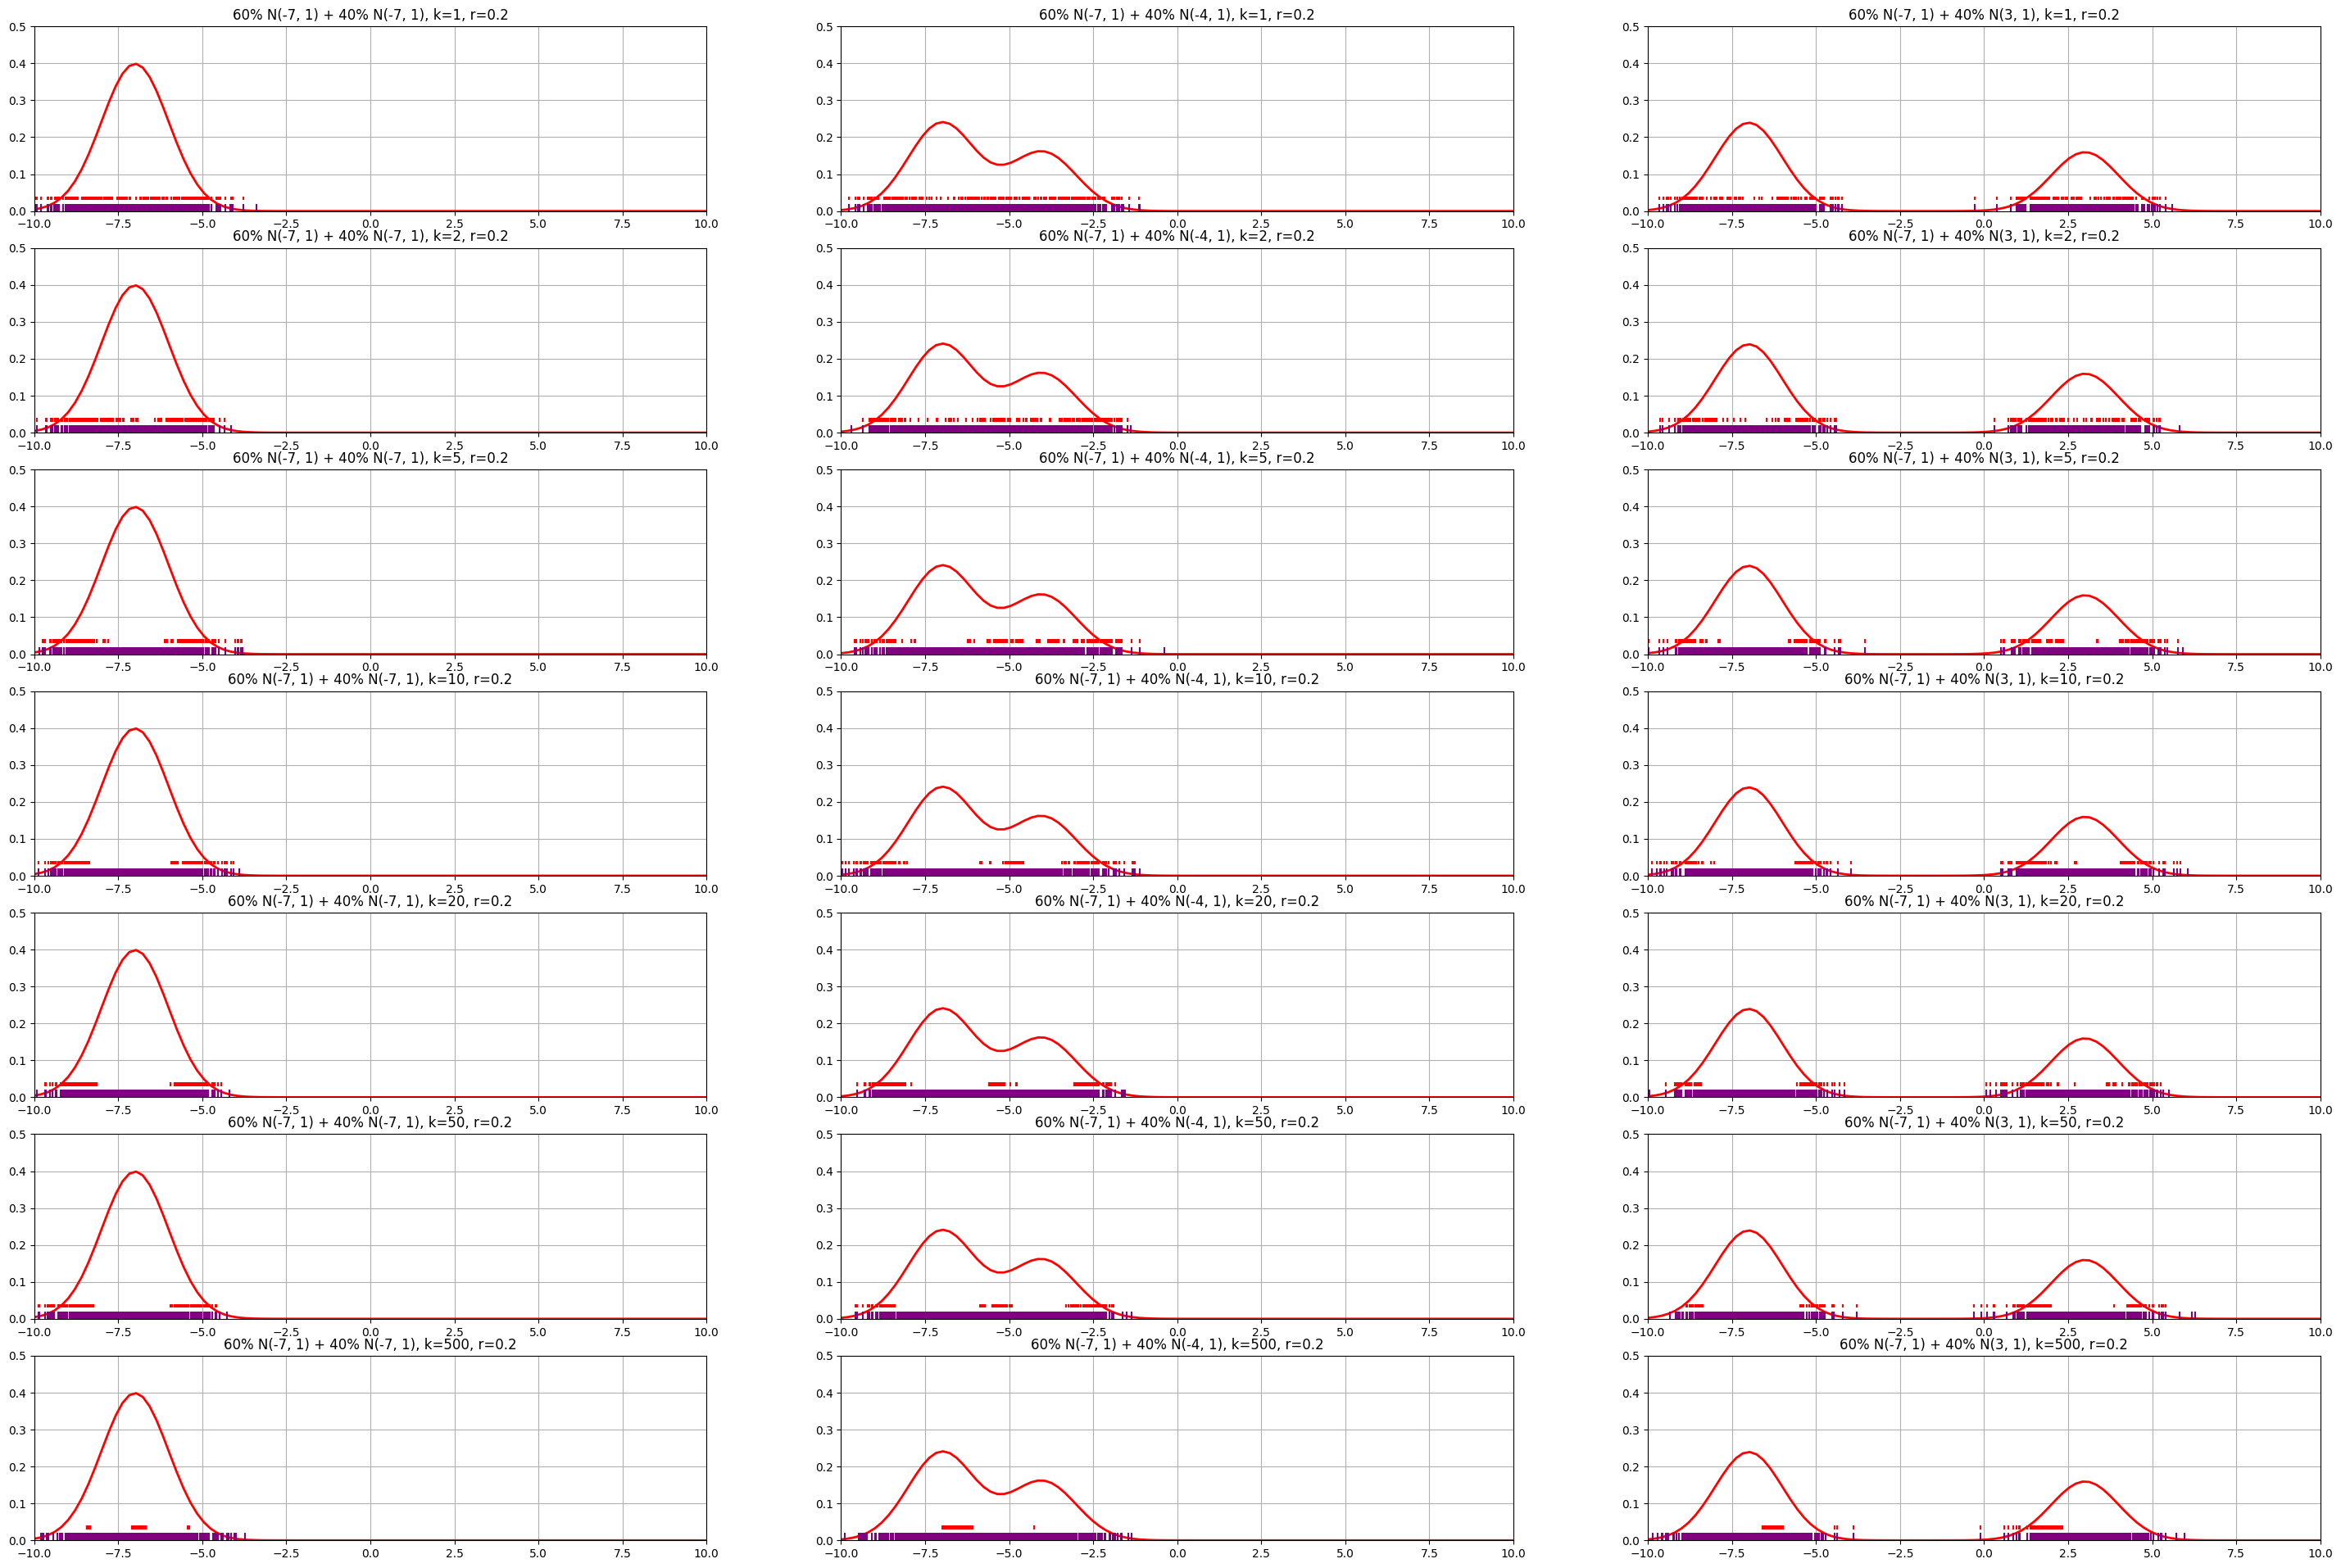

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
 
 
m = 1000
sigma = 1
w1 = .6
w2 = .4
mu1 = -7
 
r = 0.2
 
x = np.linspace(-10.0, 10.0, num=100)
 
fig, axs = plt.subplots(7, 3, figsize=(36, 24))
 
k_values = [1, 2, 5, 10, 20, 50, 500]
 
for w, k in enumerate(k_values):
    mu2 = [-7, -4, 3]
    for q, mu2 in enumerate(mu2):
        x1 = np.random.normal(mu1, 1, int(m * w1))
        x2 = np.random.normal(mu2, 1, int(m * w2))
        xi = np.sort(np .concatenate((x1, x2)))
        y = w1/(np.sqrt(2 * np.pi)) * np.exp(- ( x - mu1)**2 / (2 * sigma**2)) + w2/(np.sqrt(2 * np.pi)) * np.exp(- ( x - mu2)**2 / (2 * sigma**2))
        
        distance = np.zeros(m)
 
        for i in range(m):
            min_index = np.maximum(i-k, 0)
            max_index = np.minimum(m-1, i+k)
            distance[i] = np.minimum(np.absolute(xi[i]-xi[min_index]), np.absolute(xi[i]-xi[max_index]) )    
 
        distance_sorted = np.sort(distance)
        distance_to_catch = distance_sorted[int(m*(1-r))]
 
        elements_x = []
        for i in range(m-1):
            if distance[i] >= distance_to_catch:
                elements_x.append(xi[i])
 
        
 
        axs[w, q].plot(x, y , linewidth=2, color="r")
        axs[w, q].set_xlim([-10, 10])
        axs[w, q].set_ylim([0, .5])
        axs[w, q].grid()
        axs[w, q].vlines(x=xi, ymin=0., ymax=0.02, colors='purple', ls='-')
        axs[w, q].vlines(x=elements_x, ymin=0.03, ymax=0.04, colors='red', ls='-')
        axs[w, q].set_title('60% N(' + str(mu1) + ', 1) + 40% N(' + str(mu2) + ', 1), k='+str(k) + ', r=' + str(r) )
plt.show()